In [ ]:
!pip install --upgrade --no-cache-dir gdown
!pip install diffusers
!pip install datasets
!pip install peft
!pip install gradio

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
     

In [ ]:
import gdown
url = "https://drive.google.com/uc?id=1mR_axgYLVaFzLJ3QZw8NZlTwk6WTpcXW"
output = "/content/code.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1mR_axgYLVaFzLJ3QZw8NZlTwk6WTpcXW
To: /content/code.zip
100%|██████████| 7.28k/7.28k [00:00<00:00, 14.2MB/s]


'/content/code.zip'

In [ ]:
import zipfile
import os

zip_file_path = '/content/code.zip'
extract_folder_path = '/content/'

# Check if the zip file exists
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder_path)
else:
    print("The specified zip file does not exist.")


In [ ]:
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [ ]:
from models import Diffusion
d = Diffusion(device , "LMSD")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import gradio as gr
js = """
function createGradioAnimation() {
    document.title = "Obscura"

    var container = document.createElement('div');
    container.id = 'gradio-animation';
    container.style.fontSize = '2em';
    container.style.fontWeight = 'bold';
    container.style.textAlign = 'center';
    container.style.marginBottom = '20px';

    var text = 'Welcome to Obscura!';
    for (var i = 0; i < text.length; i++) {
        (function(i){
            setTimeout(function(){
                var letter = document.createElement('span');
                letter.style.opacity = '0';
                letter.style.transition = 'opacity 0.5s';
                letter.innerText = text[i];

                container.appendChild(letter);

                setTimeout(function() {
                    letter.style.opacity = '1';
                }, 50);
            }, i * 250);
        })(i);
    }

    var gradioContainer = document.querySelector('.gradio-container');
    gradioContainer.insertBefore(container, gradioContainer.firstChild);

    return 'Animation created';
}
"""

def generate(text ,timesteps ,guidance, dataset ,seed, width , height):
    images , prompt =  d.generate([text] , scale_guide=guidance , timesteps = timesteps , seed = seed, dataset_ = dataset, resolution=(height ,width))
    return images[0] , prompt

demo = gr.Interface(
    fn = generate,
    inputs = [
        gr.Text(label = "Prompt" ),
        gr.Slider(value=40, minimum=10, maximum=50, step=5 , label="Number of timesteps"),
        gr.Slider(value=10, minimum=5, maximum=13, step=1 , label="Guidance Scale"),
        gr.Radio(["None","Simpson", "Bender"], label="Dataset", info="Which character do you prefer?" , value="None"),
        gr.Number(value = 0 ,minimum=0 , maximum =1024, step =1 , label="Seed" ),
        gr.Number(value = 768 ,minimum=256 , maximum =1024, step =8 , label="Width" ),
        gr.Number(value = 512 ,minimum=256 , maximum =1024,step =8 ,  label="Height" )
    ],
    outputs=[
        gr.Image(label="Image"),
        gr.Text(label = "Prompt-en")

    ],
    examples=[
        ["Simpson In Garden" , 40 , 10 , "Simpson" , 16],
        ["شخصية سمبسنز في معبد مصر قديما" , 40 , 10 , "Simpson" , 20],
        ["Bender In Garden" , 40 , 10 , "Bender" , 16],
        ["Bender In Garden" , 40 , 10 , "None" , 0],
        ["سيارة في وسط البحر بجوار منزل كبير " , 40 , 10 , "None" , 20],
    ],
    js=js,
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dd8218986069cff827.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install qrcode[pil]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.2 MB/s eta 0:00:00


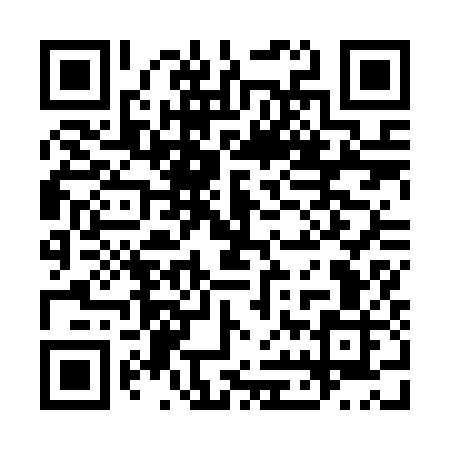

In [ ]:
import qrcode
from PIL import Image

# Define the URL you want to encode
url = demo.share_url


# Generate QR code
qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_H, box_size=10, border=4)
qr.add_data(url)
qr.make(fit=True)

# Create an image from the QR Code instance
qr.make_image(fill_color="black", back_color="white")


In [ ]:
import firebase_admin
from firebase_admin import credentials


cred = credentials.Certificate("/content/obscura-70318-firebase-adminsdk-hwwfc-c5162d05d3.json")
firebase_admin.initialize_app(cred)


In [ ]:
from firebase_admin import firestore
dp = firestore.client()

In [ ]:
collection1 = dp.collection("servers")

In [ ]:
import tensorflow as tf
collection1.add({
    "device": f"GPU T4, 16GB",
    # "device": f"GPU T4, Ver: {tf.sysconfig.get_build_info()['cuda_version']}",
    "url": demo.share_url,
    "timestamp": firestore.SERVER_TIMESTAMP

})

(DatetimeWithNanoseconds(2024, 6, 28, 11, 34, 39, 673261, tzinfo=datetime.timezone.utc),
 <google.cloud.firestore_v1.document.DocumentReference at 0x7a953f05b970>)

In [ ]:
import time

while True:
    print("Running...")  # Replace this line with your actual code

    # Sleep for a certain duration to prevent CPU usage
    time.sleep(60)  # Sleep for 60 seconds (1 minute)

Running...


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/diffusers/schedulers/scheduling_lms_discrete.py:396: UserWarning: The `scale_model_input` function should be called before `step` to ensure correct denoising. See `StableDiffusionPipeline` for a usage example.
  warnings.warn(
40it [00:09,  4.22it/s]
40it [00:08,  4.86it/s]


Running...


40it [00:08,  4.79it/s]
40it [00:08,  4.73it/s]
40it [00:08,  4.73it/s]


Running...


40it [00:08,  4.79it/s]
40it [00:08,  4.70it/s]
40it [00:08,  4.70it/s]
22it [00:04,  4.77it/s]

Running...


40it [00:08,  4.79it/s]


Bart Simpson: An old Egyptian temple.


40it [00:08,  4.79it/s]


A car in the middle of the sea next to a big house.


40it [00:08,  4.74it/s]


A car in the middle of the sea next to a big house.


25it [00:05,  4.72it/s]

Running...


40it [00:08,  4.76it/s]


Running...
Running...
A car in the middle of the sea next to a big house.


40it [00:08,  4.88it/s]


Running...
Running...


40it [00:08,  4.80it/s]


Running...


40it [00:08,  4.95it/s]


Running...
Running...
Running...


40it [00:07,  5.08it/s]
40it [00:07,  5.07it/s]


Running...


50it [00:09,  5.03it/s]


Running...
Running...


KeyboardInterrupt: 